In [1]:
# fix for keras v3.0 update
import os
#os.environ['TF_USE_LEGACY_KERAS'] = '1' 

import tensorflow as tf
import keras
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.utils import Sequence
from qkeras import *
import keras_tuner as kt

import sys 
parentdir = os.path.dirname(os.getcwd())
sys.path.insert(0, parentdir) 
from FilteringModel import *

2025-06-06 09:39:44.122658: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-06 09:39:44.123910: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-06 09:39:44.126907: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-06 09:39:44.135534: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749220784.149998  837074 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749220784.15

In [2]:
from tensorflow.keras.models import Model

# 1. Define the input
x_size = Input(shape=(1,), name="x_size")

# 2. Single Dense layer for binary classification
output = Dense(1, activation="sigmoid", name="output")(x_size)

# 3. Create and compile the model
model = Model(inputs=x_size, outputs=output)
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

# (Optional) View the model summary
model.summary()


2025-06-06 09:39:49.053737: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ x_size (InputLayer)             │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ x_size (InputLayer)             │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.3013 - loss: 0.6946 - val_accuracy: 0.5550 - val_loss: 0.6927
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.3743 - loss: 0.6943 - val_accuracy: 0.5550 - val_loss: 0.6926
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.4161 - loss: 0.6944 - val_accuracy: 0.5550 - val_loss: 0.6925
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.4161 - loss: 0.6946 - val_accuracy: 0.5550 - val_loss: 0.6924
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.4161 - loss: 0.6947 - val_accuracy: 0.5550 - val_loss: 0.6924
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.4161 - loss: 0.6948 - val_accuracy: 0.5550 - val_loss: 0.6923
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.4161 - loss: 0.6949 - val_accuracy: 0.5550 - val_loss: 0.6922
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.4161 - loss: 0.6951 - val_accuracy: 0.5550 - v

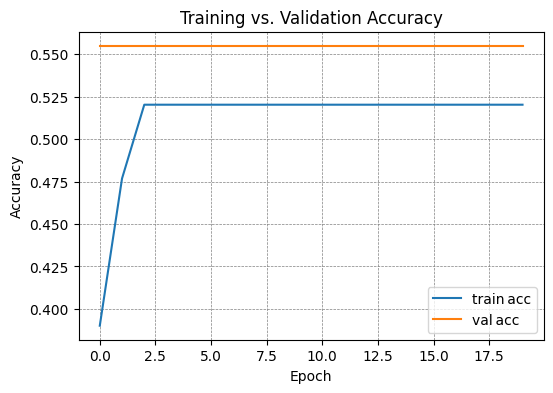

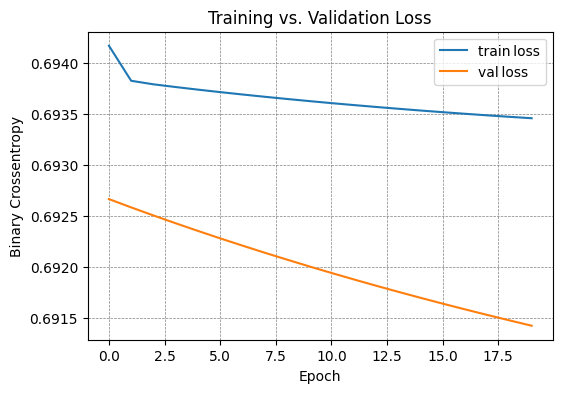

In [ ]:

import OptimizedDataGenerator4 as ODG
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# 1) Build the simple model:
def CreateSimpleXSizeModel():
    x_size = tf.keras.Input(shape=(1,), name="x_size")
    output = tf.keras.layers.Dense(1, activation="sigmoid", name="output")(x_size)
    model = tf.keras.Model(inputs=x_size, outputs=output)
    model.compile(
        optimizer="adam",
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )
    return model

model = CreateSimpleXSizeModel()
model.summary()

base_dir      = Path("./filtering_records2000")
train_dir     = base_dir / "tfrecords_train"
validation_dir= base_dir / "tfrecords_validation"

train_gen = ODG.OptimizedDataGenerator(
    load_records=True,
    tf_records_dir=str(train_dir),
    x_feature_description=["x_size"]
)

val_gen = ODG.OptimizedDataGenerator(
    load_records=True,
    tf_records_dir=str(validation_dir),
    x_feature_description=["x_size"]
)

es = EarlyStopping(
    monitor="val_loss",
    patience=20,
    restore_best_weights=True
)

history = model.fit(
    x=train_gen,
    validation_data=val_gen,
    epochs=20,
    callbacks=[es],
    shuffle=False,
    verbose=1
)


# 6) Plot training/validation accuracy and loss:
plt.figure(figsize=(6,4))
plt.plot(history.history["accuracy"], label="train acc")
plt.plot(history.history["val_accuracy"], label="val acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(linestyle="--", linewidth=0.5, color="gray")
plt.title("Training vs. Validation Accuracy")
plt.show()

plt.figure(figsize=(6,4))
plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="val loss")
plt.xlabel("Epoch")
plt.ylabel("Binary Crossentropy")
plt.legend()
plt.grid(linestyle="--", linewidth=0.5, color="gray")
plt.title("Training vs. Validation Loss")
plt.show()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ y_profile (InputLayer)          │ (None, 13, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 13)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_128 (Dense)              │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,921 (7.50 KB)

 Trainable params: 1,921 (7.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.4872 - loss: 1.5740 - val_accuracy: 0.5750 - val_loss: 0.9596
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.4202 - loss: 1.1370 - val_accuracy: 0.6385 - val_loss: 0.6793
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.5235 - loss: 0.8145 - val_accuracy: 0.6440 - val_loss: 0.6933
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.4965 - loss: 0.8458 - val_accuracy: 0.6503 - val_loss: 0.6827
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.4983 - loss: 0.8336 - val_accuracy: 0.6534 - val_loss: 0.6821
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.4932 - loss: 0.8307 - val_accuracy: 0.6563 - val_loss: 0.6772
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.4935 - loss: 0.8257 - val_accuracy: 0.6582 - val_loss: 0.6773
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.4902 - loss: 0.8207 - val_accuracy: 0.

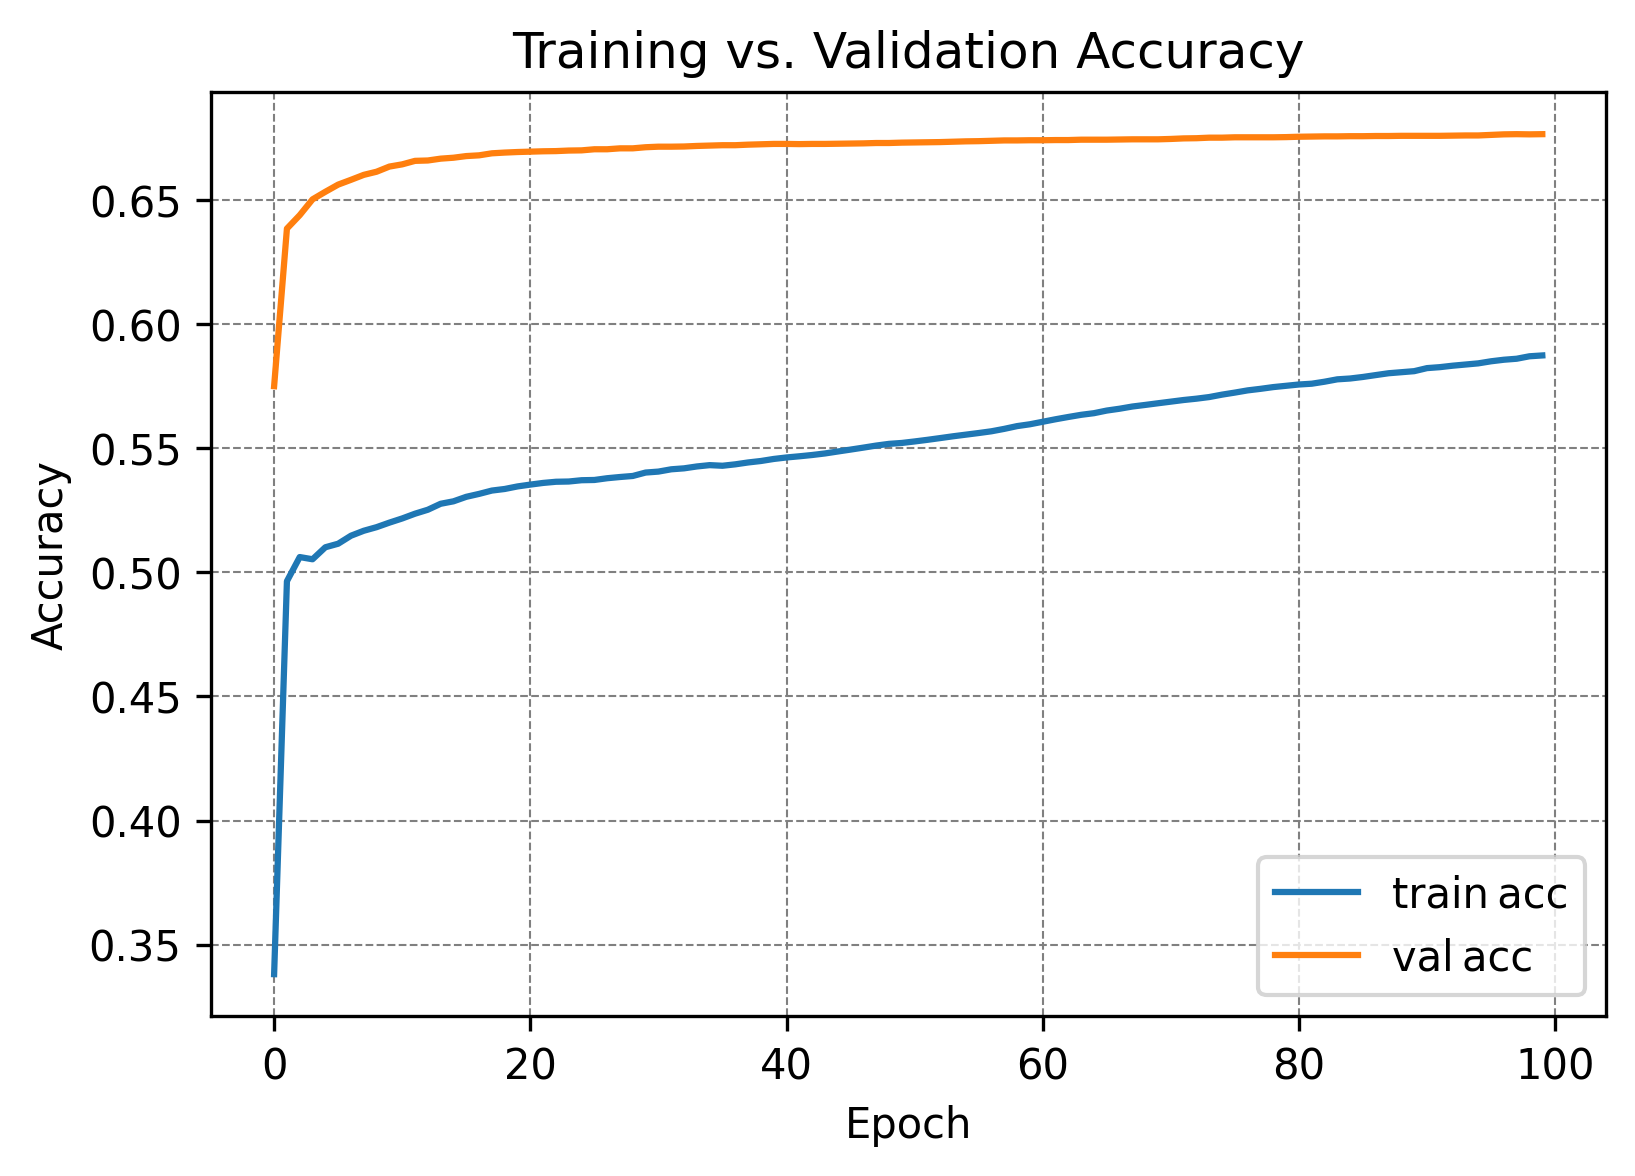

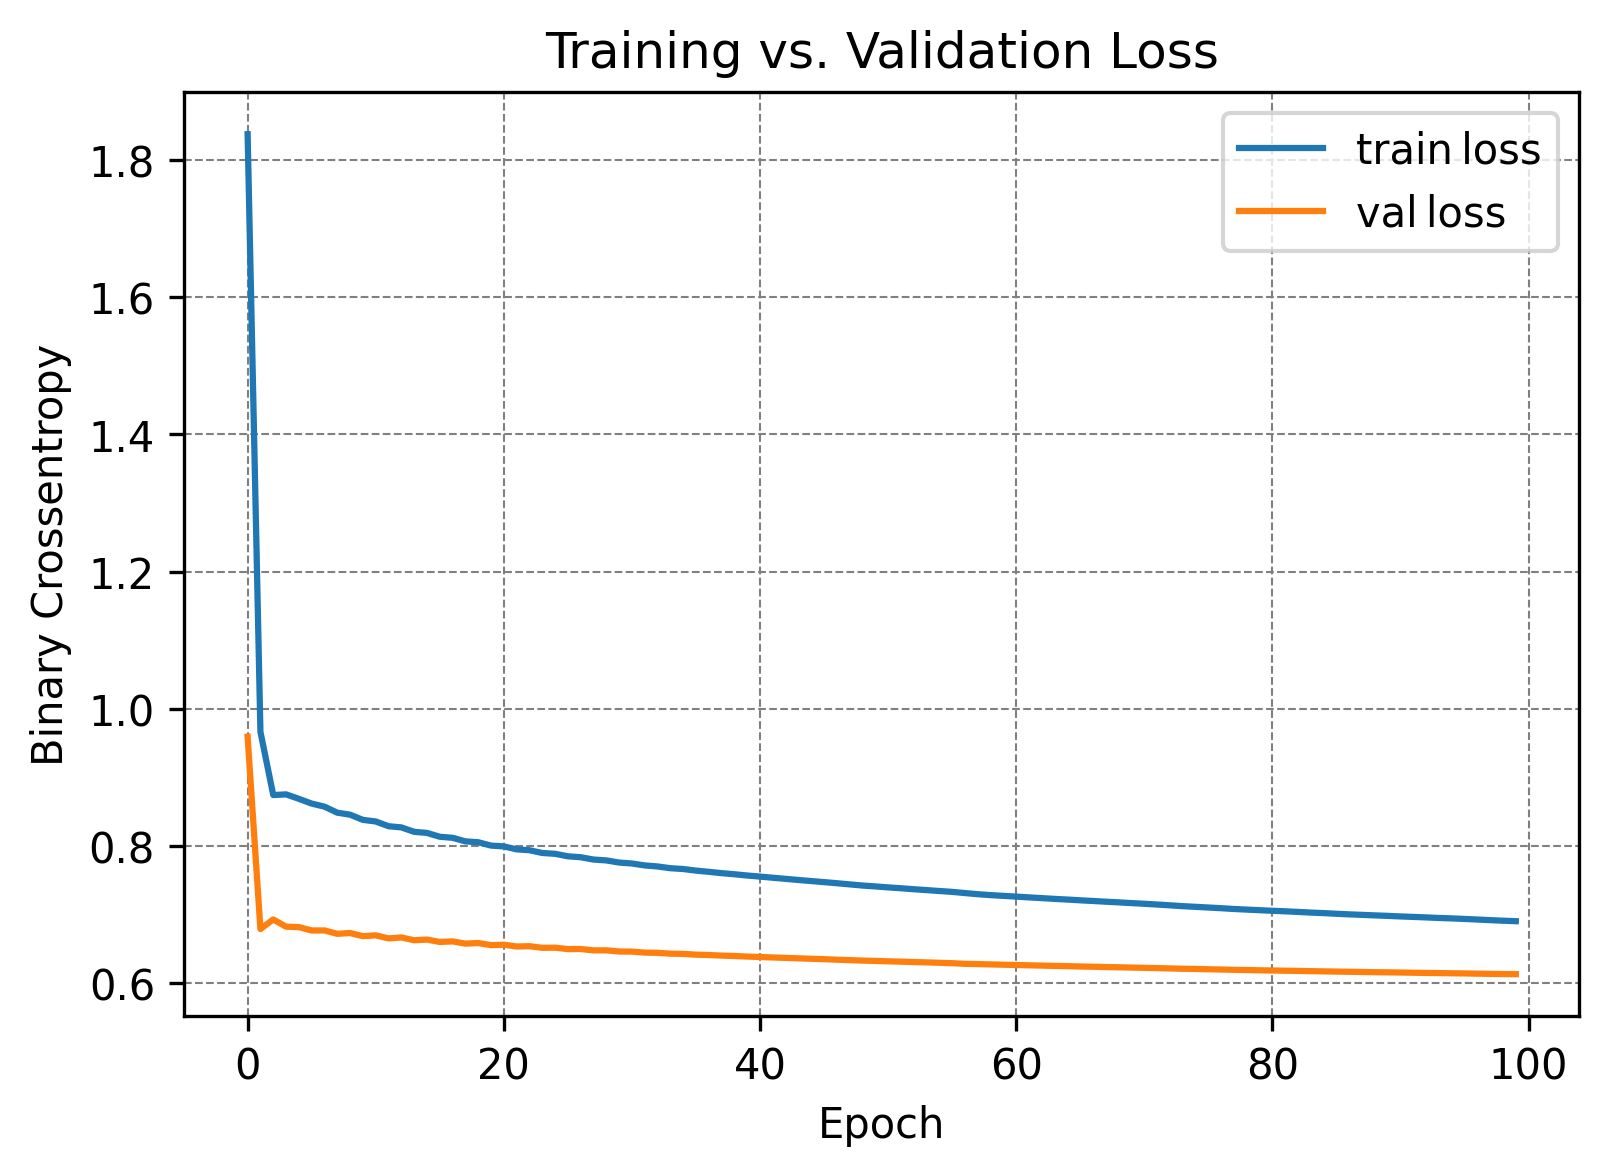

In [4]:
import OptimizedDataGenerator4 as ODG
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from pathlib import Path

# 1) Build a model that takes y_profile (13×1), flattens, then has a 128-unit hidden layer before the final output:
def CreateYProfileWithHidden128():
    y_profile = tf.keras.Input(shape=(13, 1), name="y_profile")
    x = tf.keras.layers.Flatten(name="flatten")(y_profile)
    x = tf.keras.layers.Dense(128, activation="relu", name="hidden_128")(x)
    output = tf.keras.layers.Dense(1, activation="sigmoid", name="output")(x)
    model = tf.keras.Model(inputs=y_profile, outputs=output)
    model.compile(
        optimizer="adam",
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )
    return model

model = CreateYProfileWithHidden128()
model.summary()


# 2) TFRecord directories:
base_dir       = Path("./filtering_records2000")
train_dir      = base_dir / "tfrecords_train"
validation_dir = base_dir / "tfrecords_validation"


# 3) Generators loading only "y_profile":
train_gen = ODG.OptimizedDataGenerator(
    load_records=True,
    tf_records_dir=str(train_dir),
    x_feature_description=["y_profile"]
)

val_gen = ODG.OptimizedDataGenerator(
    load_records=True,
    tf_records_dir=str(validation_dir),
    x_feature_description=["y_profile"]
)


# 4) EarlyStopping callback:
es = EarlyStopping(
    monitor="val_loss",
    patience=20,
    restore_best_weights=True
)


# 5) Train for 20 epochs:
history = model.fit(
    x=train_gen,
    validation_data=val_gen,
    epochs=100,
    callbacks=[es],
    shuffle=False,
    verbose=1
)


# 6) Plot accuracy and loss:
plt.figure(figsize=(6, 4))
plt.plot(history.history["accuracy"], label="train acc")
plt.plot(history.history["val_accuracy"], label="val acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(linestyle="--", linewidth=0.5, color="gray")
plt.title("Training vs. Validation Accuracy")
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="val loss")
plt.xlabel("Epoch")
plt.ylabel("Binary Crossentropy")
plt.legend()
plt.grid(linestyle="--", linewidth=0.5, color="gray")
plt.title("Training vs. Validation Loss")
plt.show()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ x_profile           │ (None, 21, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ y_profile           │ (None, 13, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_x (Flatten) │ (None, 21)        │          0 │ x_profile[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_y (Flatten) │ (None, 13)        │          0 │ y_profile[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concat_xy           │ (None, 34)        │          0 │ flatten_x[0][0],  │
│ (Concatenate)       │                   │            │ flatten_y[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ hidden_128 (Dense)  │ (None, 128)       │      4,480 │ concat_xy[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output (Dense)      │ (None, 1)         │        129 │ hidden_128[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 4,609 (18.00 KB)

 Trainable params: 4,609 (18.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.5823 - loss: 1.6099 - val_accuracy: 0.5641 - val_loss: 1.2911
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.2757 - loss: 1.5757 - val_accuracy: 0.6378 - val_loss: 0.7439
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.5025 - loss: 0.9101 - val_accuracy: 0.6458 - val_loss: 0.7111
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.4894 - loss: 0.9227 - val_accuracy: 0.6464 - val_loss: 0.7214
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.4814 - loss: 0.9356 - val_accuracy: 0.6491 - val_loss: 0.7154
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.4890 - loss: 0.9198 - val_accuracy: 0.6526 - val_loss: 0.7029
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.4944 - loss: 0.9059 - val_accuracy: 0.6548 - val_loss: 0.7003
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.4976 - loss: 0.8977 - val_accuracy: 0.

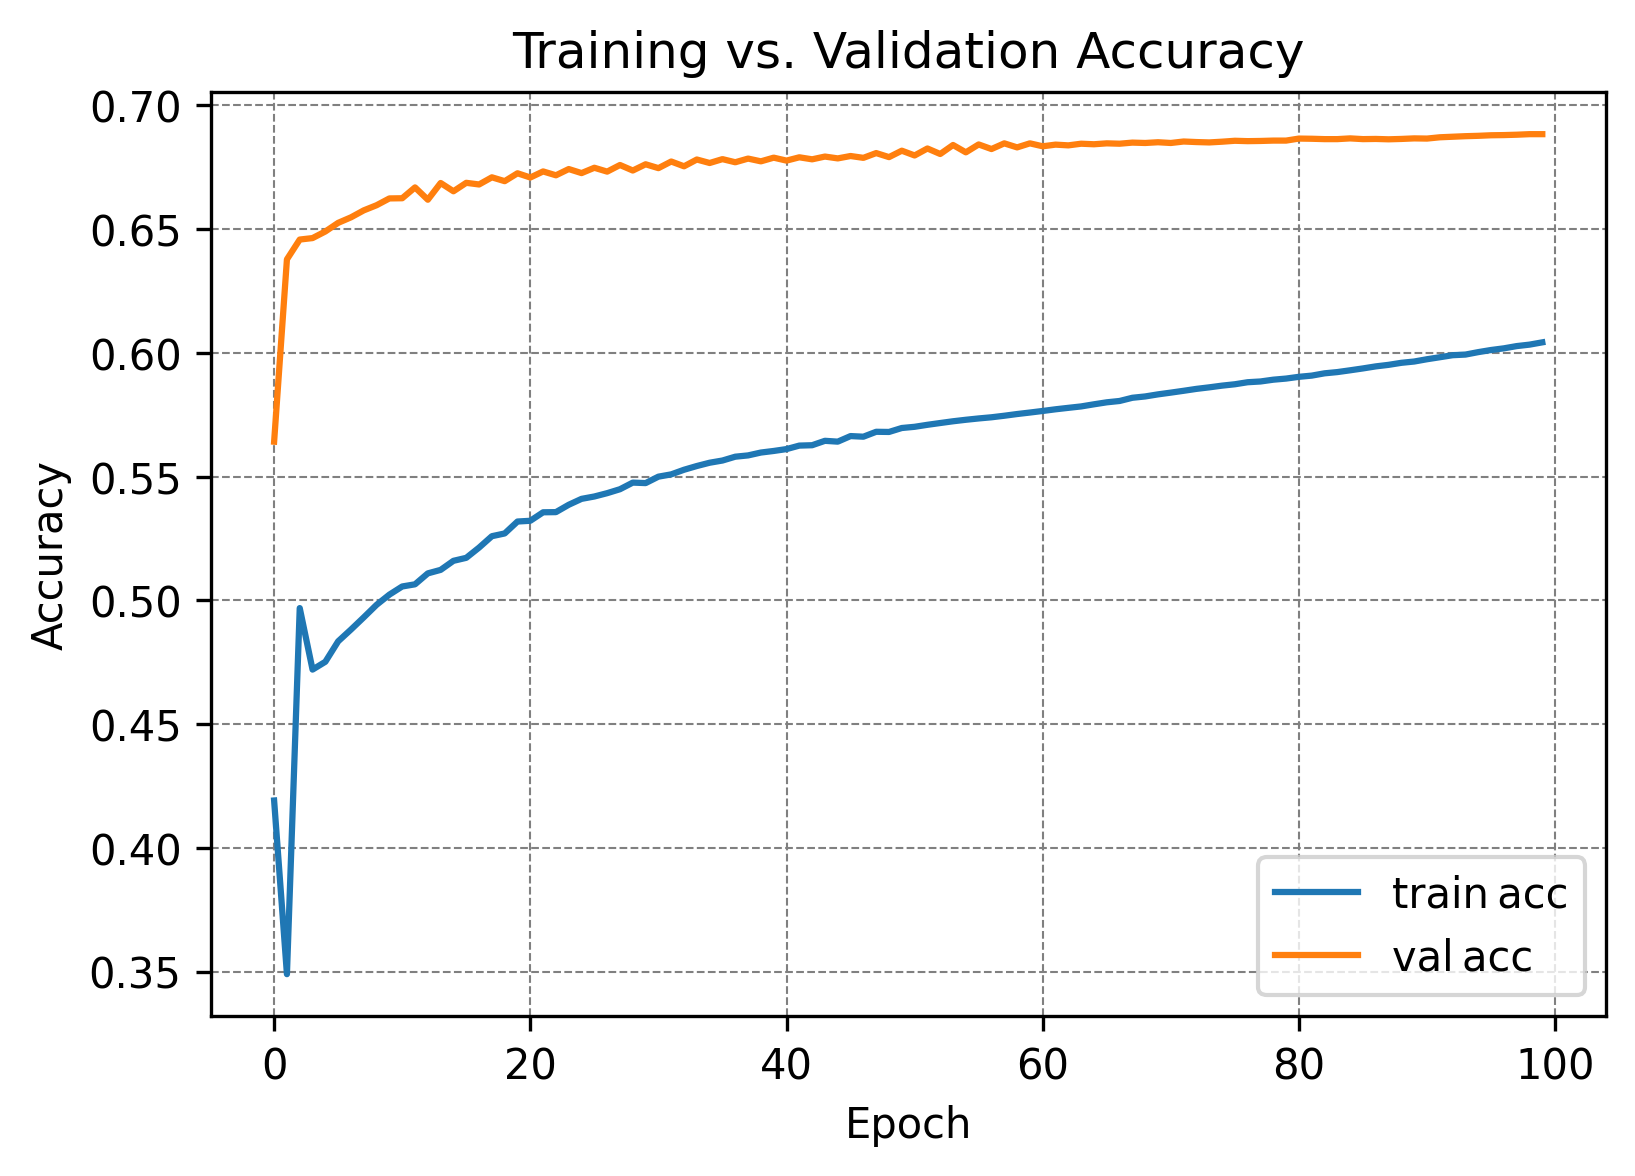

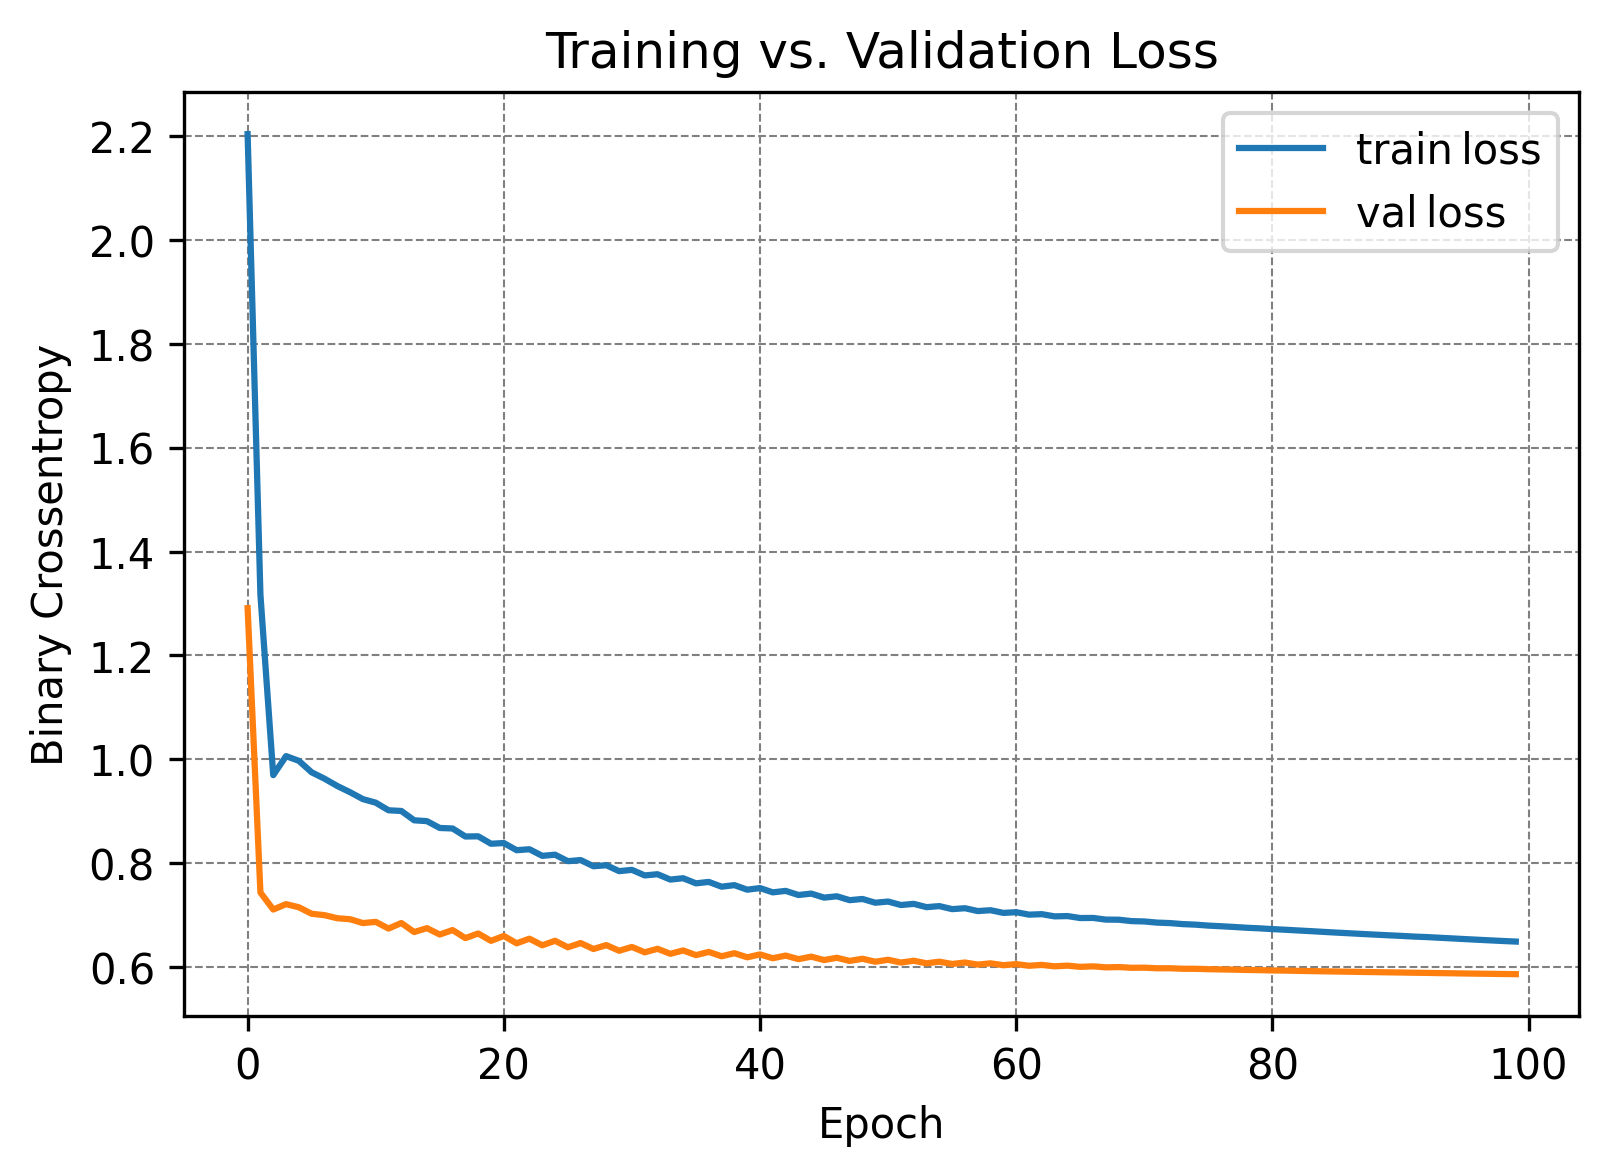

In [5]:
import OptimizedDataGenerator4 as ODG
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from pathlib import Path

# 1) Build a model that takes both x_profile (21×1) and y_profile (13×1):
def CreateXYProfileModel():
    x_profile = tf.keras.Input(shape=(21, 1), name="x_profile")
    y_profile = tf.keras.Input(shape=(13, 1), name="y_profile")
    
    # Flatten each profile
    x_flat = tf.keras.layers.Flatten(name="flatten_x")(x_profile)    # shape → (21,)
    y_flat = tf.keras.layers.Flatten(name="flatten_y")(y_profile)    # shape → (13,)
    
    # Concatenate into a single vector of length 34
    concat = tf.keras.layers.Concatenate(name="concat_xy")([x_flat, y_flat])
    
    # Hidden Dense(128) layer
    hidden = tf.keras.layers.Dense(128, activation="relu", name="hidden_128")(concat)
    
    # Final sigmoid output
    output = tf.keras.layers.Dense(1, activation="sigmoid", name="output")(hidden)
    
    model = tf.keras.Model(inputs=[x_profile, y_profile], outputs=output)
    model.compile(
        optimizer="adam",
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )
    return model

model = CreateXYProfileModel()
model.summary()


# 2) TFRecord directories:
base_dir       = Path("./filtering_records2000")
train_dir      = base_dir / "tfrecords_train"
validation_dir = base_dir / "tfrecords_validation"


# 3) Generators loading both "x_profile" and "y_profile":
train_gen = ODG.OptimizedDataGenerator(
    load_records=True,
    tf_records_dir=str(train_dir),
    x_feature_description=["x_profile", "y_profile"]
)

val_gen = ODG.OptimizedDataGenerator(
    load_records=True,
    tf_records_dir=str(validation_dir),
    x_feature_description=["x_profile", "y_profile"]
)


# 4) EarlyStopping callback:
es = EarlyStopping(
    monitor="val_loss",
    patience=20,
    restore_best_weights=True
)


# 5) Train for 100 epochs (or adjust as needed):
history = model.fit(
    x=train_gen,
    validation_data=val_gen,
    epochs=100,
    callbacks=[es],
    shuffle=False,
    verbose=1
)


# 6) Plot training/validation accuracy and loss:
plt.figure(figsize=(6, 4))
plt.plot(history.history["accuracy"], label="train acc")
plt.plot(history.history["val_accuracy"], label="val acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(linestyle="--", linewidth=0.5, color="gray")
plt.title("Training vs. Validation Accuracy")
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="val loss")
plt.xlabel("Epoch")
plt.ylabel("Binary Crossentropy")
plt.legend()
plt.grid(linestyle="--", linewidth=0.5, color="gray")
plt.title("Training vs. Validation Loss")
plt.show()


Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.5947 - loss: 1.6212 - val_accuracy: 0.5635 - val_loss: 1.3186
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.2108 - loss: 1.5245 - val_accuracy: 0.6385 - val_loss: 0.7023
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.5187 - loss: 0.8201 - val_accuracy: 0.6487 - val_loss: 0.6651
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.5002 - loss: 0.8019 - val_accuracy: 0.6507 - val_loss: 0.6626
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.5032 - loss: 0.7927 - val_accuracy: 0.6571 - val_loss: 0.6474
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.5209 - loss: 0.7571 - val_accuracy: 0.6618 - val_loss: 0.6281
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.5416 - loss: 0.7289 - val_accuracy: 0.6671 - val_loss: 0.6210
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.5509 - loss: 0.7066 - val_accuracy: 0.

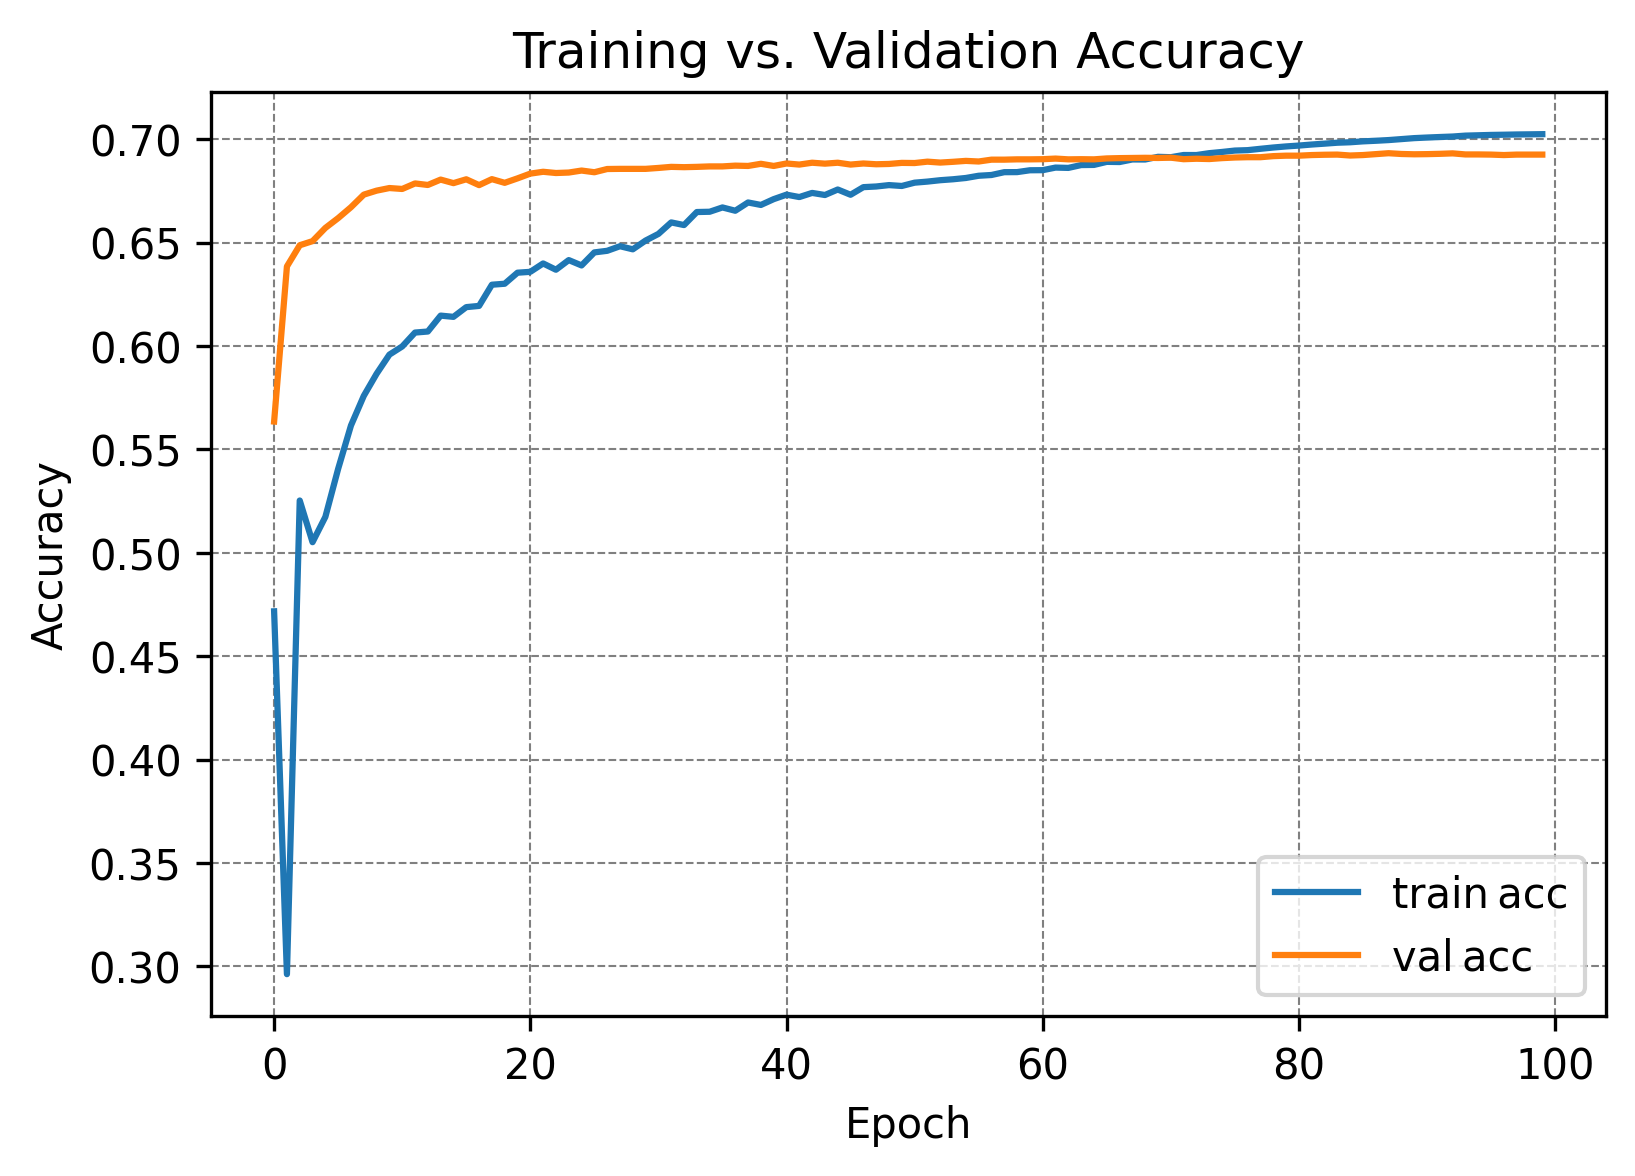

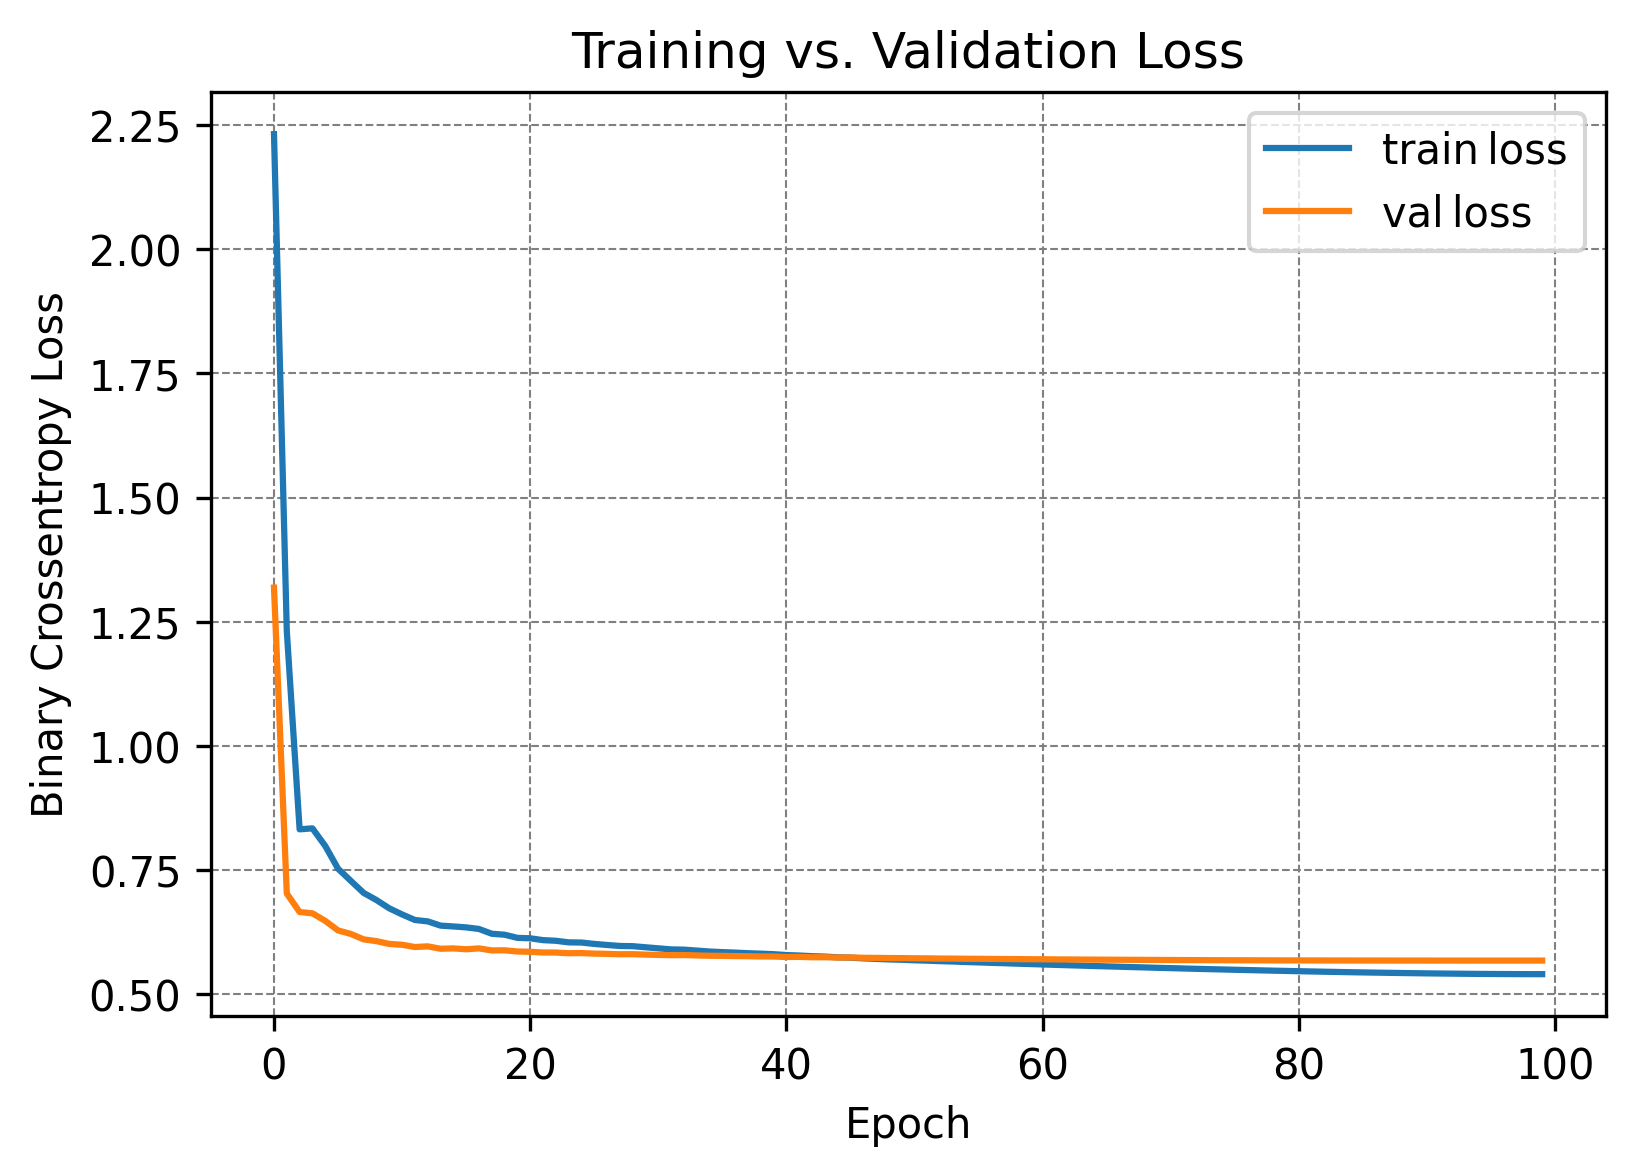

In [6]:
import OptimizedDataGenerator4 as ODG
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from pathlib import Path

# 1) Build a model that takes x_profile (21×1) and y_profile (13×1),
#    then two hidden layers (128 → 32) before output.
def CreateXYProfileModel():
    x_profile = tf.keras.Input(shape=(21, 1), name="x_profile")
    y_profile = tf.keras.Input(shape=(13, 1), name="y_profile")
    
    x_flat = tf.keras.layers.Flatten(name="flatten_x")(x_profile)    # → (21,)
    y_flat = tf.keras.layers.Flatten(name="flatten_y")(y_profile)    # → (13,)
    
    concat = tf.keras.layers.Concatenate(name="concat_xy")([x_flat, y_flat])  # → (34,)
    
    hidden1 = tf.keras.layers.Dense(128, activation="relu", name="hidden_128")(concat)
    hidden2 = tf.keras.layers.Dense(32, activation="relu",  name="hidden_32")(hidden1)
    
    output = tf.keras.layers.Dense(1, activation="sigmoid", name="output")(hidden2)
    
    model = tf.keras.Model(inputs=[x_profile, y_profile], outputs=output)
    return model

model = CreateXYProfileModel()


# 2) Instead of a fixed‐LR Adam, create a CosineDecay schedule:
#    - initial_learning_rate = 1e-3 (for example)
#    - decay_steps = total_training_steps (epochs × steps_per_epoch)
#    - alpha = final_learning_rate_fraction (e.g. 0.0 to decay to zero)
#
#    We must know: steps_per_epoch = number of training batches per epoch.
#    Since train_gen yields batches automatically, you can do:
#       steps_per_epoch = len(train_gen)
#    If you plan 100 epochs, total_steps = 100 × steps_per_epoch.

base_dir       = Path("./filtering_records2000")
train_dir      = base_dir / "tfrecords_train"
validation_dir = base_dir / "tfrecords_validation"

train_gen = ODG.OptimizedDataGenerator(
    load_records=True,
    tf_records_dir=str(train_dir),
    x_feature_description=["x_profile", "y_profile"]
)
val_gen = ODG.OptimizedDataGenerator(
    load_records=True,
    tf_records_dir=str(validation_dir),
    x_feature_description=["x_profile", "y_profile"]
)

# how many batches per epoch?
steps_per_epoch = len(train_gen)

# choose number of epochs (e.g., 100)
num_epochs = 100

total_steps = steps_per_epoch * num_epochs

# CosineDecay: initial_lr=1e-3, decay_steps=total_steps, alpha=0.0 (ends at 0)
lr_schedule = tf.keras.optimizers.schedules.CosineDecay(
    initial_learning_rate=1e-3,
    decay_steps=total_steps,
    alpha=0.0
)

# Create Adam optimizer with that schedule
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

# 3) Compile model with cosine‐decayed learning rate and binary_crossentropy loss:
model.compile(
    optimizer=optimizer,
    loss="binary_crossentropy",
    metrics=["accuracy"]
)


# 4) EarlyStopping callback
es = EarlyStopping(
    monitor="val_loss",
    patience=20,
    restore_best_weights=True
)

# 5) Fit for num_epochs
history = model.fit(
    x=train_gen,
    validation_data=val_gen,
    epochs=num_epochs,
    callbacks=[es],
    shuffle=False,
    verbose=1
)


# 6) Plot accuracy and loss
plt.figure(figsize=(6, 4))
plt.plot(history.history["accuracy"],   label="train acc")
plt.plot(history.history["val_accuracy"], label="val acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(linestyle="--", linewidth=0.5, color="gray")
plt.title("Training vs. Validation Accuracy")
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(history.history["loss"],   label="train loss")
plt.plot(history.history["val_loss"], label="val loss")
plt.xlabel("Epoch")
plt.ylabel("Binary Crossentropy Loss")
plt.legend()
plt.grid(linestyle="--", linewidth=0.5, color="gray")
plt.title("Training vs. Validation Loss")
plt.show()


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step


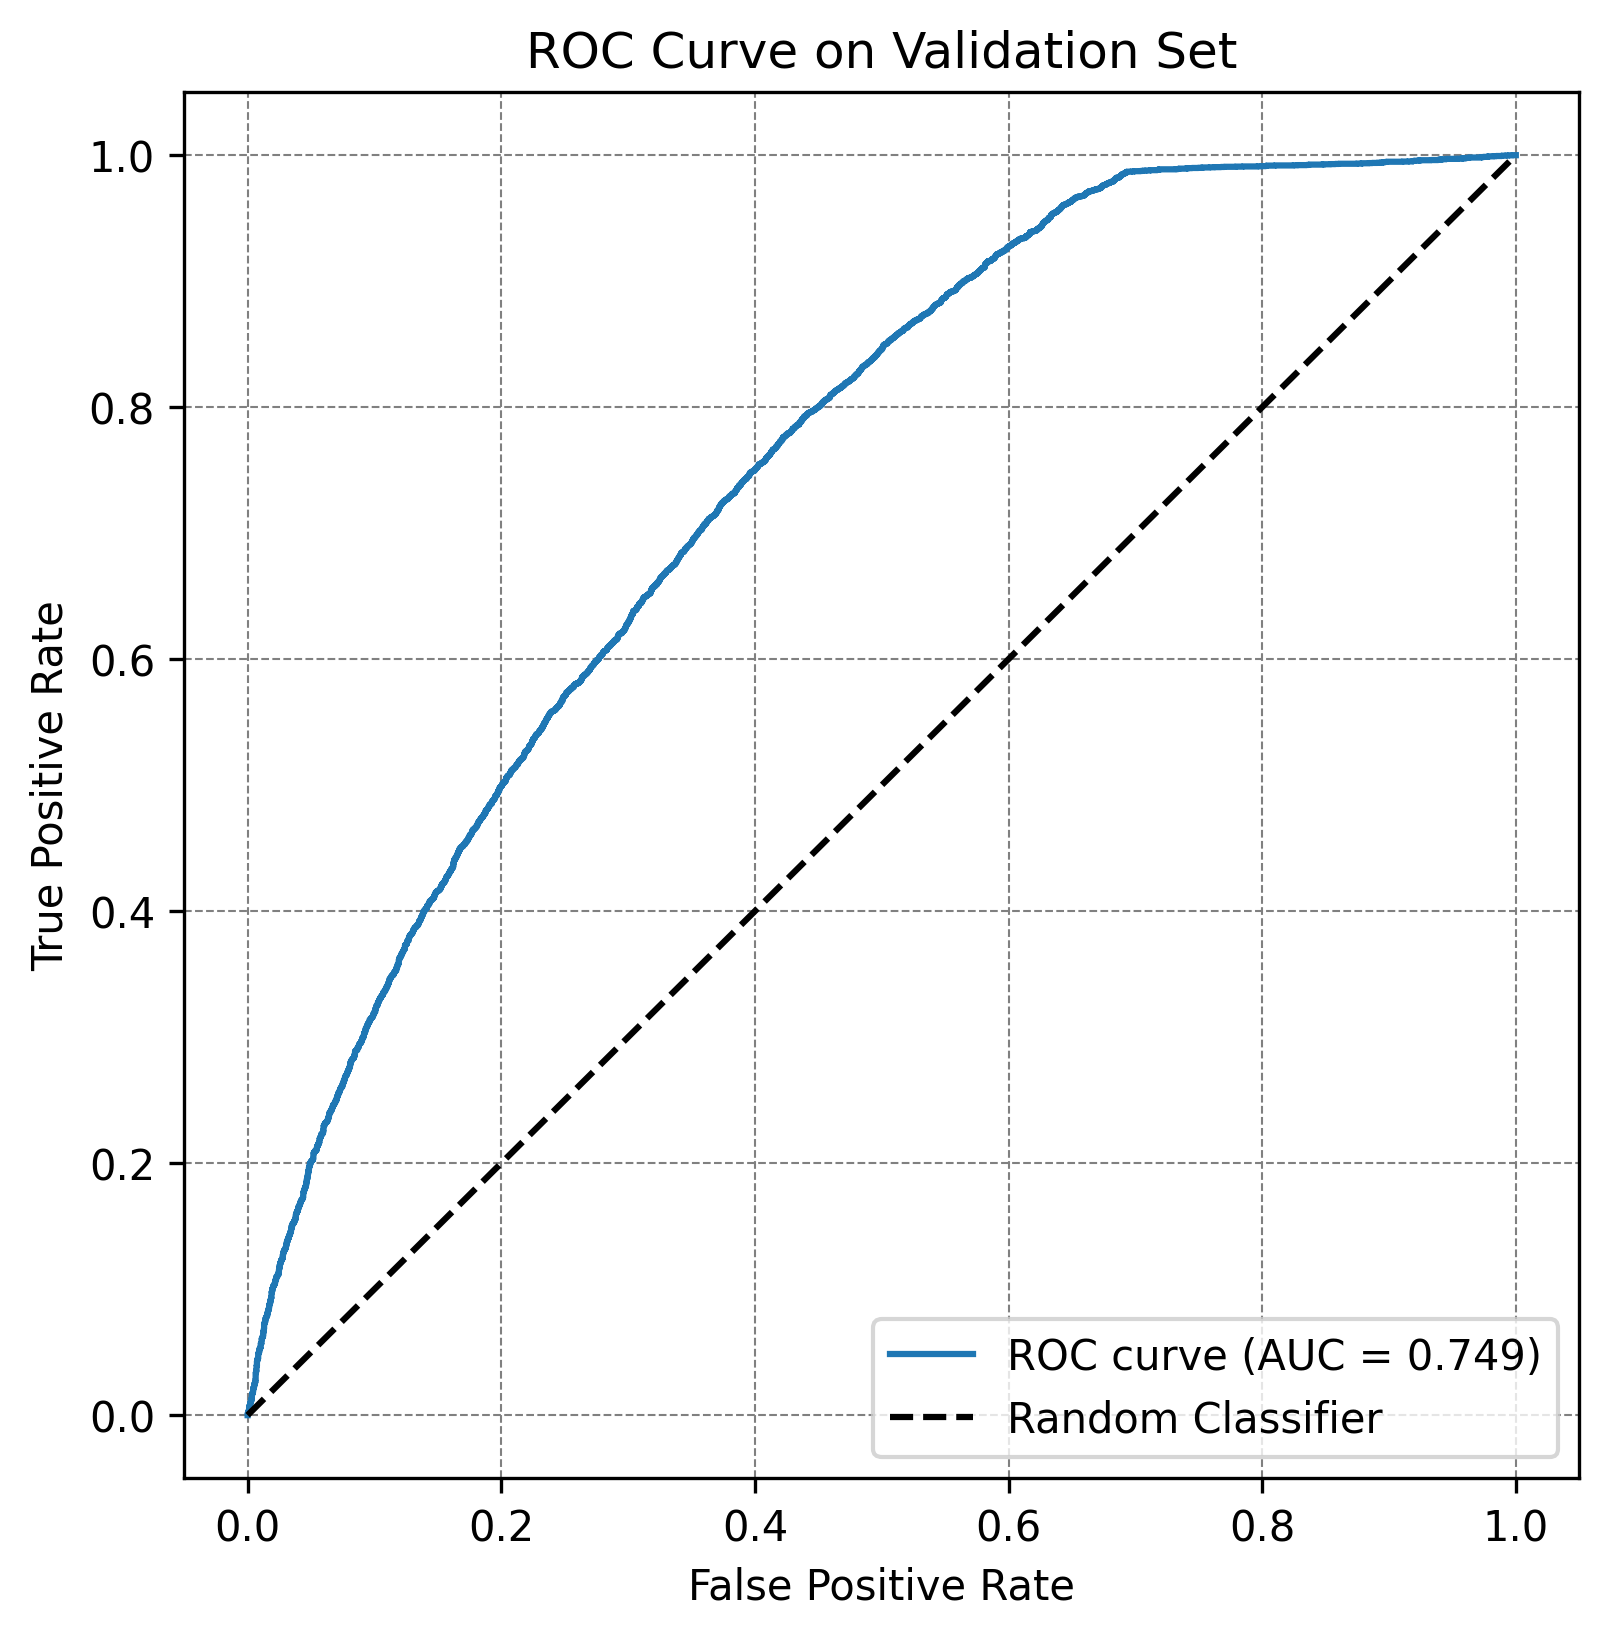

In [7]:
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# 1) Get predicted probabilities on validation set
y_pred_prob = model.predict(val_gen).flatten()  # shape = (num_val_samples,)

# 2) Collect true labels from val_gen
y_true_list = []
for _, y_batch in val_gen:
    y_true_list.append(y_batch)
y_true = np.concatenate(y_true_list, axis=0).flatten()  # shape = (num_val_samples,)

# 3) Compute ROC metrics
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
roc_auc = auc(fpr, tpr)

# 4) Plot ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], "k--", label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve on Validation Set")
plt.legend(loc="lower right")
plt.grid(linestyle="--", linewidth=0.5, color="gray")
plt.show()
